In [11]:
# Management libraries 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# finance libraries
import yfinance as yf

In [15]:
####################################################################################
####################### PLANK: The Brdige to Equity Analysis #######################
####################################################################################


# Equity Quick Stats
def stockstats(ticker):
    # Fundamental Price Metrics
    stock = yf.Ticker(ticker)
    SharesOutstanding = stock.info['sharesOutstanding']
    PE = stock.info['trailingPE']
    forwardPE = stock.info['forwardPE']
    PEG = stock.info['pegRatio']
    PricetoSales = stock.info['priceToSalesTrailing12Months']
    PricetoBook = stock.info['priceToBook']
    #Alpha = # Create seperate function
    #RSI = plotRSI(ticker)
    Marketcap = stock.info['marketCap']
    
    # DebttoEquity = 
    EPS = stock.info['trailingEps']
    #NextEarnings = # Create seperate function
    #ReturnonEquity = # Create seperate function
    #OperatingMargin = # Create seperate function
    ProfitMargin = stock.info['profitMargins']
    ShortRatio = stock.info['shortRatio']
    ShortFloat = stock.info['shortPercentOfFloat']
    
    # Volume Metrics
    fiftyTwoWeekHigh = stock.info['fiftyTwoWeekHigh']
    fiftyTwoWeekLow = stock.info['fiftyTwoWeekLow']
    YTDreturn = stock.info['52WeekChange']
    SMA50 = stock.info['fiftyDayAverage']
    SMA200 = stock.info['twoHundredDayAverage']
    Volume = stock.info['volume']
    AvgVolume = stock.info['averageVolume']
    Beta = stock.info['beta']
    
    # Dividend Metrics
    NextDivDate = stock.actions['Dividends'].loc[(stock.actions['Dividends']!=0)] # Create seperate function
    past12moPayout = stock.info['trailingAnnualDividendRate']
    Ydividend = YearDividend(ticker)
    Payoutratio = stock.info['payoutRatio']
    
    price = round(Marketcap/SharesOutstanding, 2)
    ################################################
    print("_______________________________________")
    print("       Stock Information       ")
    print("Company: ", ticker)
    print("Price :", price)
    print("YTD Return: ", round((100*YTDreturn),2), "%")
    print("Market Cap: ", Marketcap)
    print("Shares Outstanding: ", SharesOutstanding)
    print("_______________________________________")
    print("       Financial Metrics       ")
    print("PE ratio ", PE)
    print("Price-to-book: ", PricetoBook)
    print("Earnings-per-share: ", EPS)
    print("Shares Short:", ShortFloat,"%")
    print("Dividends past year:", round(Ydividend, 2))
    print("Yeild per Share: ", round((Ydividend/price *100),4),'%')
    print("_______________________________________")
    print("       Volume Metrics       ")
    print("Volume: ", Volume)
    print("Average-Volume: ", AvgVolume)
    print("52 Week High: ", fiftyTwoWeekHigh)
    print("52 Week Low: ", fiftyTwoWeekLow)
    print("50 Day Moving Average: ", SMA50)
    print("200 Day Moving Average: ", SMA200)
    print("Beta: ", Beta)
    return

# Yearly Dividend 
def YearDividend(ticker):
    stockdata = yf.Ticker(ticker)
    dividends = pd.DataFrame(stockdata.dividends)
    dividends = dividends[-4::]
    Ydividend = dividends.sum()
    Ydividend = Ydividend.reset_index(drop=True)
    return Ydividend.item()

# Plot the stock
def plotStock(ticker):
    stock = yf.download(ticker)
    stockDF = pd.DataFrame(stock['Close'])
    stockDF = stockDF['2017-01-01'::]
    stockDF['SMA200'] = stockDF.rolling(window=200).mean()
    stockDF.plot(figsize=(20,10))
    return 

# Plot the Volume
def plotVolume(ticker):
    stock = yf.download(ticker)
    stockDF = pd.DataFrame(stock['Volume'])
    stockDF = stockDF['2017-01-01'::]
    stockDF.plot(figsize=(20,5))
    return

# Plot our Heat Indicies with Market Indicies
def GlobalIndicies(ticker1):
    # Adjust plot size to make heatmap bigger
    fig, ax = plt.subplots(figsize=(20,10))
    
    # Create dictionary of tickers and names
    symbol_dict = {
        ticker1:ticker,
        '^GSPC': 'S&P500',
        '^IXIC': 'NASDAQ',
        '^NYA': 'NYSE Composite'
    }
    # Get the ticker entered and add on major US indexes
    tickers = '^GSPC', '^IXIC', '^NYA', (ticker1)
    # Download our Data
    DF2 = yf.download(tickers, start='2000-01-20', end='2021-01-01')['Close']
    # Format to yearly returns
    DF3 = DF2.resample("Y").ffill().pct_change()
    DF4 = DF3.T
    DF5 = DF4 * 100
    # Create heatmap for monthly returns
    #Set Color Schema
    cmap = sns.diverging_palette(10, 133, as_cmap=True)
    # Generate heatmap
    heatmap = sns.heatmap(DF5, annot=True, linewidth=.5, 
                         cmap=cmap, cbar=False, vmin=-20, 
                         vmax=20, xticklabels=DF5.columns.year,
                        yticklabels=symbol_dict.values())
    heatmap.set_title('Pct Annual Returns (%)')
    return

def plot_recommendations(ticker):
    stock = yf.Ticker(ticker)
    data = stock.recommendations['2020'::]
    data1 = data['To Grade']
    data2 = pd.DataFrame(data1)
    data2 = data2.value_counts()
    data3 = data2.plot.bar(figsize=(20,5))
    return data3

_______________________________________
       Stock Information       
Company:  msft
Price : 257.38
YTD Return:  31.6 %
Market Cap:  1938475581440
Shares Outstanding:  7531570176
_______________________________________
       Financial Metrics       
PE ratio  35.074955
Price-to-book:  14.416624
Earnings-per-share:  7.338
Shares Short: 0.0062 %
Dividends past year: 2.19
Yeild per Share:  0.8509 %
_______________________________________
       Volume Metrics       
Volume:  27219956
Average-Volume:  26229796
52 Week High:  263.19
52 Week Low:  193.55
50 Day Moving Average:  249.75618
200 Day Moving Average:  237.22214
Beta:  0.78913
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  4 of 4 completed


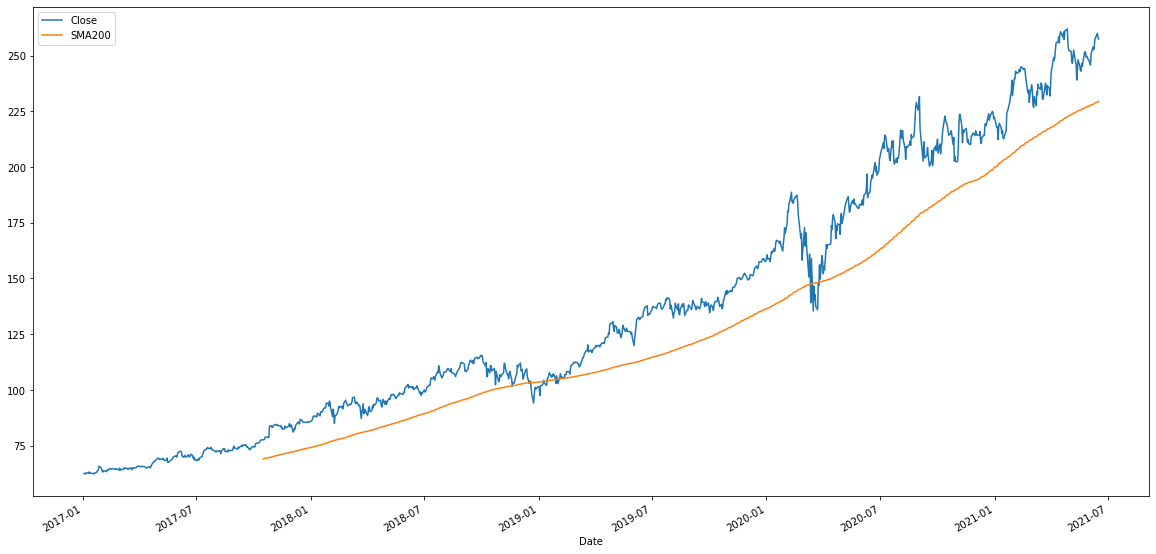

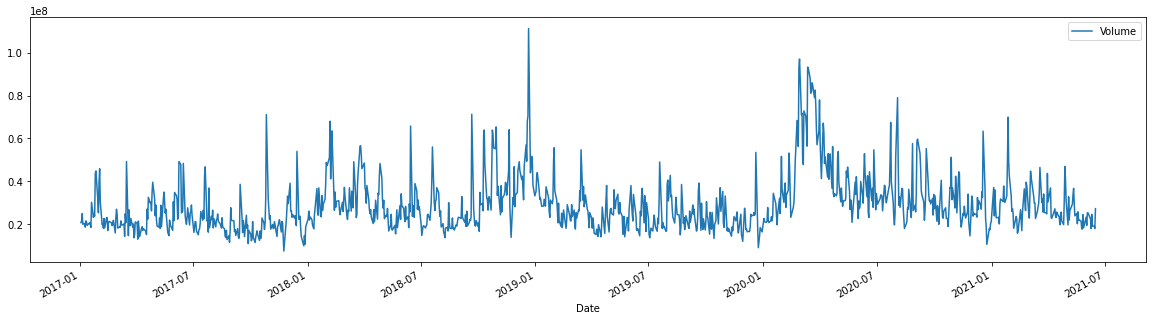

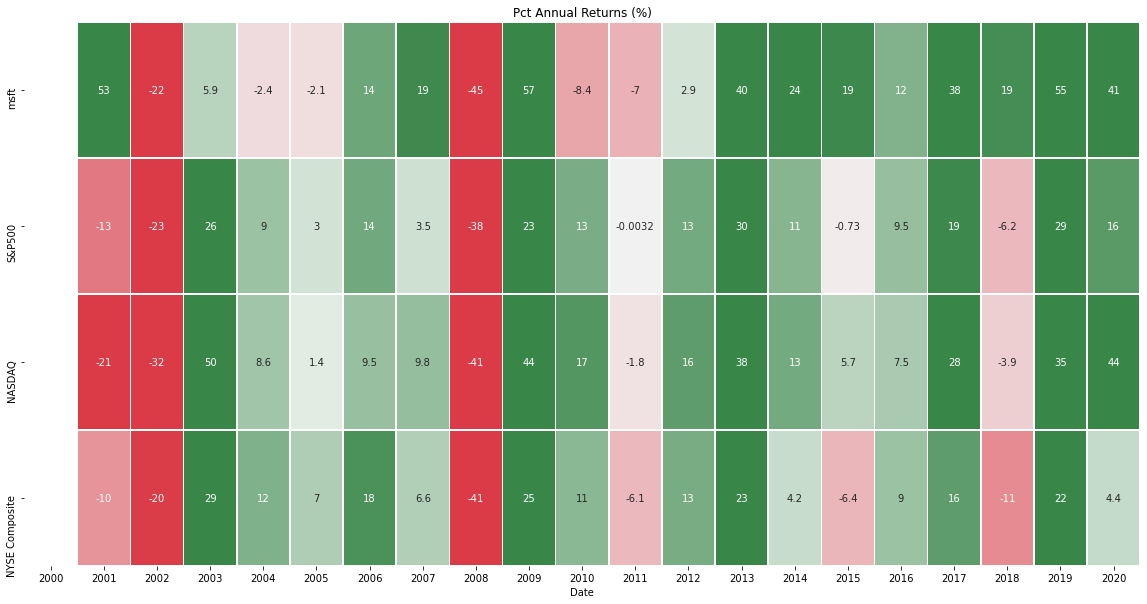

In [16]:
ticker='msft'

stockstats(ticker)
plotStock(ticker)
plotVolume(ticker)
GlobalIndicies(ticker)